In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
file_path = 'data/r1_r2_annotations_liwc_h.xlsx'
dfh = pd.read_excel(file_path, engine='openpyxl')
dfh.head()

d:\Library\Downloads\Documents\School\SUPSI_23-24\hackathon_2\project\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,text,proc_text,A1,A2,A3,A4,A5,A6,majority_vote,roundID,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Fuck you china. I was 2 years clear of severe ...,Fuck you china. I was 2 years clear of severe ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,26.92,7.69,3.85,0.0,0.00,3.85,11.54,0.0
1,Feeling so off today and I can’t tell if this ...,Feeling so off today and I can’t tell if this ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,28.00,12.00,0.00,0.0,0.00,8.00,8.00,16.0
2,Good lord people we need to stop having people...,Good lord people we need to stop having people...,PP,UN,PP,PO,PP,PP,PP,Round1,...,0.0,0.00,19.05,4.76,0.00,0.0,0.00,4.76,9.52,0.0
3,"I'm telling yall, Chill the fuck out!! This Vi...","I'm telling yall, Chill the fuck out!! This Vi...",PO,PO,PO,PO,PO,PP,PO,Round1,...,0.0,0.00,37.21,4.65,2.33,0.0,23.26,2.33,4.65,0.0
4,Episode of #CoronaVirus panic. Man took his gl...,Episode of #CoronaVirus panic. Man took his gl...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,1.72,20.69,10.34,5.17,0.0,0.00,3.45,1.72,0.0


In [36]:
# print(dfh.proc_text.count())
# display(dfh.proc_text.duplicated().sum())


353


0

In [4]:
human_path = 'data/r1_r2_annotations_liwc_h.xlsx'
# model_path = 'data/model_annotations_liwc_h.xlsx'

dfh = pd.read_excel(human_path, engine='openpyxl')
# dfm = pd.read_excel(model_path, engine='openpyxl')

dfh.head()

d:\Library\Downloads\Documents\School\SUPSI_23-24\hackathon_2\project\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,text,proc_text,A1,A2,A3,A4,A5,A6,majority_vote,roundID,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Fuck you china. I was 2 years clear of severe ...,Fuck you china. I was 2 years clear of severe ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,26.92,7.69,3.85,0.0,0.00,3.85,11.54,0.0
1,Feeling so off today and I can’t tell if this ...,Feeling so off today and I can’t tell if this ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,28.00,12.00,0.00,0.0,0.00,8.00,8.00,16.0
2,Good lord people we need to stop having people...,Good lord people we need to stop having people...,PP,UN,PP,PO,PP,PP,PP,Round1,...,0.0,0.00,19.05,4.76,0.00,0.0,0.00,4.76,9.52,0.0
3,"I'm telling yall, Chill the fuck out!! This Vi...","I'm telling yall, Chill the fuck out!! This Vi...",PO,PO,PO,PO,PO,PP,PO,Round1,...,0.0,0.00,37.21,4.65,2.33,0.0,23.26,2.33,4.65,0.0
4,Episode of #CoronaVirus panic. Man took his gl...,Episode of #CoronaVirus panic. Man took his gl...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,1.72,20.69,10.34,5.17,0.0,0.00,3.45,1.72,0.0


In [5]:
# x = set(dfh.columns.values)
# y = set(dfm.columns.values)

# print(x.difference(y))
# print(y.difference(x))

In [6]:
print(dfh.columns.values)

['text' 'proc_text' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'majority_vote'
 'roundID' 'Segment' 'WC' 'Analytic' 'Clout' 'Authentic' 'Tone' 'WPS'
 'BigWords' 'Dic' 'Linguistic' 'function' 'pronoun' 'ppron' 'i' 'we' 'you'
 'shehe' 'they' 'ipron' 'det' 'article' 'number' 'prep' 'auxverb' 'adverb'
 'conj' 'negate' 'verb' 'adj' 'quantity' 'Drives' 'affiliation' 'achieve'
 'power' 'Cognition' 'allnone' 'cogproc' 'insight' 'cause' 'discrep'
 'tentat' 'certitude' 'differ' 'memory' 'Affect' 'tone_pos' 'tone_neg'
 'emotion' 'emo_pos' 'emo_neg' 'emo_anx' 'emo_anger' 'emo_sad' 'swear'
 'Social' 'socbehav' 'prosocial' 'polite' 'conflict' 'moral' 'comm'
 'socrefs' 'family' 'friend' 'female' 'male' 'Culture' 'politic'
 'ethnicity' 'tech' 'Lifestyle' 'leisure' 'home' 'work' 'money' 'relig'
 'Physical' 'health' 'illness' 'wellness' 'mental' 'substances' 'sexual'
 'food' 'death' 'need' 'want' 'acquire' 'lack' 'fulfill' 'fatigue'
 'reward' 'risk' 'curiosity' 'allure' 'Perception' 'attention' 'motion'
 'space' 'vi

In [7]:
dfh.drop(['A1','A2','A3','A4','A5','A6'],inplace=True,axis=1)
dfh.drop(['roundID'],inplace=True,axis=1)

In [8]:
dfh = dfh[dfh['majority_vote'] != "NoMajority"]
dfh.reset_index(drop=True, inplace=True)
print(dfh.majority_vote.value_counts())
dfh.columns.values

majority_vote
PO    160
UN     98
PP     95
Name: count, dtype: int64


array(['text', 'proc_text', 'majority_vote', 'Segment', 'WC', 'Analytic',
       'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic',
       'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you',
       'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity',
       'Drives', 'affiliation', 'achieve', 'power', 'Cognition',
       'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg',
       'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad',
       'swear', 'Social', 'socbehav', 'prosocial', 'polite', 'conflict',
       'moral', 'comm', 'socrefs', 'family', 'friend', 'female', 'male',
       'Culture', 'politic', 'ethnicity', 'tech', 'Lifestyle', 'leisure',
       'home', 'work', 'money', 'relig', 'Physical', 'health', 'illness',
       'wellness', 'mental', 'substances', 'sexual', 'food', 'death',
  

In [9]:
target = dfh['majority_vote']
dfh.drop(['majority_vote'],inplace=True,axis=1)

## tfid vectorizing

In [10]:


X_train, X_test, y_train, y_test = train_test_split(dfh, target, test_size=0.2, random_state=42)

X_train_tweet = X_train["proc_text"]
X_test_tweet = X_test["proc_text"]
X_train.drop(['proc_text',"text"],inplace=True,axis=1)
X_test.drop(['proc_text',"text"],inplace=True,axis=1)

# Vectorizing the tweets
# vectorizer = CountVectorizer(stop_words='english')
tf_id_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tweet_tfid = tf_id_vectorizer.fit_transform(X_train_tweet)
X_test_tweet_tfid = tf_id_vectorizer.transform(X_test_tweet)

In [11]:


# Generating TF-IDF vectors for visualization
texts = dfh['proc_text'].values
tfidf_matrix = X_train_tweet_tfid

# Converting TF-IDF matrix to dense format and getting feature names
tfidf_dense = tfidf_matrix.todense()
feature_names = tf_id_vectorizer.get_feature_names_out()

# Creating a DataFrame for easier manipulation
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

In [12]:
# Summarizing the TF-IDF scores for each word across all documents to rank them
word_tfidf_sum = df_tfidf.sum().sort_values(ascending=False)

print(word_tfidf_sum.head(20))

coronavirus    13.011386
panic          12.825192
covid19        10.503754
amp             8.478384
people          6.803599
attacks         5.860307
attack          5.231702
anxiety         5.030002
just            4.981243
having          4.093204
time            3.802178
stay            3.781728
covid_19        3.779082
need            3.723927
don             3.669231
pandemic        3.646436
fear            3.590636
like            3.508335
covid           3.471495
depression      3.381855
dtype: float64


In [13]:
# heatmap
# plt.figure(figsize=(12, 12))
# sns.heatmap(df_tfidf.iloc[:, :40], cmap='YlGnBu')
# plt.title('TF-IDF Scores Heatmap for Top 30 Words in All Documents')
# plt.xlabel('Top 30 Words')
# plt.ylabel('Documents')
# plt.show()

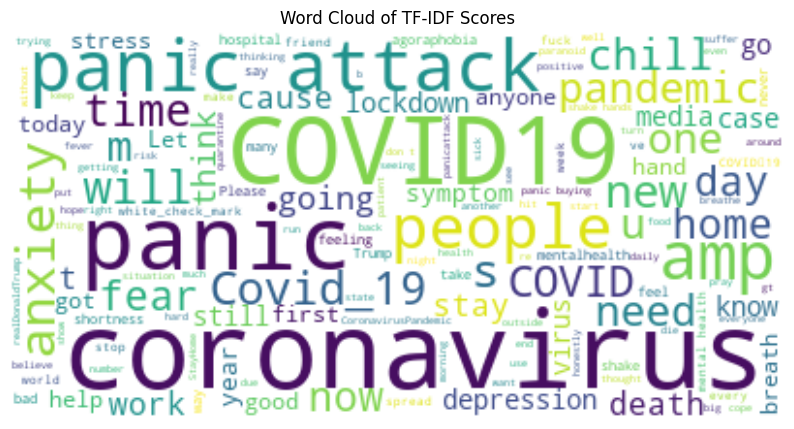

In [14]:
# word cloud
combined_texts = ' '.join(texts)
wordcloud = WordCloud(background_color='white', max_words=200).generate(combined_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores')
plt.show()

## bag of words

In [15]:
# Applying Bag of Words model on the processed text
count_vect = CountVectorizer(stop_words='english')
X_train_bow = count_vect.fit_transform(X_train_tweet)
X_test_bow = count_vect.transform(X_test_tweet)

# Converting BoW matrix to DataFrame for easier visualization
feature_names_bow = count_vect.get_feature_names_out()
df_bow = pd.DataFrame(X_train_bow.toarray(), columns=feature_names_bow)
# Displaying the shape of the BoW matrix and the first few rows of the DataFrame
df_bow_shape = df_bow.shape
print('Shape of Bag of Words Matrix:', df_bow_shape)
display(df_bow.head())

Shape of Bag of Words Matrix: (282, 2550)


,000,008,059,099,10,100,10pm,11am,11th,12,...,ytd,yurihorota,zaidzamanhamid,zealous,zero,zirconia,zombie,zone,zones,यरस
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## word2vec

In [16]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenizing the processed text
train_texts_tokenized = [word_tokenize(text) for text in X_train_tweet]
test_texts_tokenized = [word_tokenize(text) for text in X_test_tweet]

# Training a Word2Vec model
word2vec_model = Word2Vec(sentences=train_texts_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Summarizing the model
print('Word2Vec model trained.')
print('Vocabulary size:', len(word2vec_model.wv.key_to_index))

# Exploring word vectors
example_word = 'panic'
example_vector = word2vec_model.wv[example_word]
print(f'Vector representation for "{example_word}":\
{example_vector}')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaisb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec model trained.
Vocabulary size: 3269
Vector representation for "panic":[-1.52792245e-01  2.10241437e-01  3.26763131e-02  4.82163616e-02
  1.67380702e-02 -3.97040218e-01  2.08093852e-01  6.24755442e-01
 -2.34347463e-01 -1.47476584e-01 -4.42565493e-02 -3.82754296e-01
 -2.20884685e-03  1.51196957e-01  1.06920227e-01 -1.72776282e-01
  4.29691076e-02 -3.08739781e-01 -5.69940768e-02 -4.97844607e-01
  2.07563460e-01  1.40187666e-01  3.42541933e-01 -1.57209769e-01
  1.64320935e-02  9.10696480e-03 -1.79459706e-01 -1.21889018e-01
 -3.00863743e-01  4.81385142e-02  3.05757821e-01  6.28474876e-02
  1.39958426e-01 -1.94669947e-01 -5.35746925e-02  3.02197874e-01
  1.04681581e-01 -1.24358505e-01 -1.42005488e-01 -3.67255598e-01
  6.33934105e-05 -2.99536347e-01 -1.83914587e-01  8.04129317e-02
  2.15225965e-01 -3.43791768e-02 -2.89268553e-01 -2.11067800e-03
  1.19891733e-01  1.34283483e-01  1.66317463e-01 -2.72783637e-01
 -1.16509721e-01 -1.00577369e-01 -6.89877719e-02  1.27342522e-01
  1.965054

In [17]:
import numpy as np

# Function to convert texts into a mean vector using Word2Vec model
def text_to_mean_vector(text_list, model):
    # Filter the words in text that are in the model's vocabulary
    vector_list = [model.wv[word] for word in text_list if word in model.wv.key_to_index]
    if len(vector_list) > 0:
        mean_vector = np.mean(vector_list, axis=0)
    else:
        mean_vector = np.zeros(model.vector_size)
    return mean_vector

# Converting all texts to mean vectors
X_train_vec = np.array([text_to_mean_vector(text, word2vec_model) for text in train_texts_tokenized ])
X_test_vec = np.array([text_to_mean_vector(text, word2vec_model) for text in test_texts_tokenized ])


## predicting

In [18]:
display(X_train.head(2),X_test.head(2))
display(X_train_tweet[:2],X_test_tweet[:2])
display(X_train_tweet_tfid)

,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
101,1,24,62.1,40.06,89.39,1.00,24.00,20.83,95.83,66.67,...,0.0,0.0,4.17,0.0,0.0,0.0,0.0,0.0,4.17,8.33
202,1,50,19.3,7.28,63.35,4.56,16.67,12.00,90.00,62.00,...,0.0,0.0,36.00,6.0,8.0,2.0,6.0,6.0,8.00,0.00


,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
219,1,35,72.76,72.87,11.24,1.98,17.5,25.71,94.29,68.57,...,0.0,0.0,20.00,5.71,5.71,0.0,0.0,5.71,2.86,11.43
42,1,30,49.68,10.48,93.95,1.00,15.0,10.00,96.67,73.33,...,0.0,0.0,6.67,3.33,0.00,0.0,0.0,0.00,3.33,0.00


101    Who else is having panic attacks when they go ...
202    Have you tried CBD oil as a "cure"?  I've been...
Name: proc_text, dtype: object

219    I think, this is the chance to become 'THE SUP...
42     Now when I see ppl get close to each other on ...
Name: proc_text, dtype: object

<282x2550 sparse matrix of type '<class 'numpy.float64'>'
	with 5361 stored elements in Compressed Sparse Row format>

In [19]:
def do_logistic_regression(X_tr,X_te):
    # Setting up the logistic regression model
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')

    # Defining the parameter grid for grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Performing grid search with 5-fold cross-validation
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_tr, y_train)

    # Best parameters found by grid search
    best_params = grid_search.best_params_
    print('Best parameters found by grid search:', best_params)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predicting on both training and testing sets
    y_pred_train = best_model.predict(X_tr)
    y_pred_test = best_model.predict(X_te)

    return y_pred_train,y_pred_test
        

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
labels = y_train.unique()

def plot_confustion_matrix(labels_test, labels_pred,title=''):
    acc = np.mean(labels_test == labels_pred)
    cm = confusion_matrix(y_true=labels_test, y_pred=labels_pred)
    sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='03d', cmap='coolwarm')
    plt.xlabel('Prediction', fontsize = 12) 
    plt.xticks(rotation=45)
    plt.ylabel('Truth', fontsize = 12) 
    plt.title(f"Confusion Matrix testing: {title} (acc={round(acc*100,4)}%)", fontsize = 15)
    return cm

def evaluate(y_pred_test):
    class_report = classification_report(y_test, y_pred_test)
    print('Classification Report:\n', class_report)

    cm = plot_confustion_matrix(y_test, y_pred_test)

Using TF-IDF
tf-idf shape:  (282, 394)
full shape:  (282, 513)
Best parameters found by grid search: {'C': 0.1, 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

          PO       0.76      0.81      0.79        27
          PP       0.96      0.92      0.94        26
          UN       0.76      0.72      0.74        18

    accuracy                           0.83        71
   macro avg       0.83      0.82      0.82        71
weighted avg       0.83      0.83      0.83        71



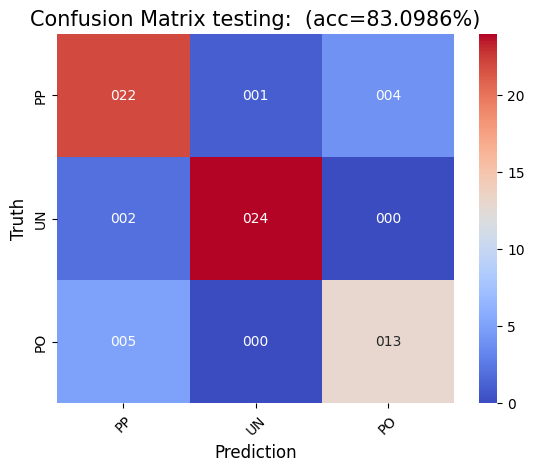

In [21]:
tf_id_vectorizer = TfidfVectorizer(stop_words='english',min_df=0.01,max_df=0.9)
X_train_tweet_tfid = tf_id_vectorizer.fit_transform(X_train_tweet)
X_test_tweet_tfid = tf_id_vectorizer.transform(X_test_tweet)

print("Using TF-IDF")
print("tf-idf shape: ", X_train_tweet_tfid.shape)
X_train_full = np.concatenate((X_train,X_train_tweet_tfid.toarray()),axis=1)
X_test_full = np.concatenate((X_test,X_test_tweet_tfid.toarray()),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te = do_logistic_regression(X_train_full,X_test_full)
evaluate(y_pred_te)


Using Bag of Words
bow shape:  (282, 2550)
full shape:  (282, 2669)
Best parameters found by grid search: {'C': 1, 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

          PO       0.85      0.85      0.85        27
          PP       0.93      0.96      0.94        26
          UN       0.88      0.83      0.86        18

    accuracy                           0.89        71
   macro avg       0.89      0.88      0.88        71
weighted avg       0.89      0.89      0.89        71



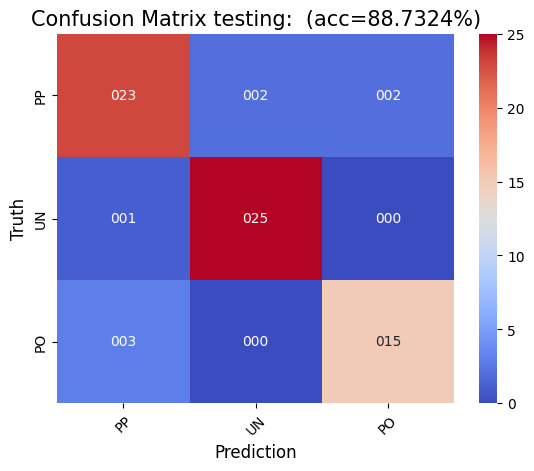

In [22]:
# bag of word
print("Using Bag of Words")
print("bow shape: ", X_train_bow.shape)
X_train_full = np.concatenate((X_train,X_train_bow.toarray()),axis=1)
X_test_full = np.concatenate((X_test,X_test_bow.toarray()),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te = do_logistic_regression(X_train_full,X_test_full)
evaluate(y_pred_te)

Using Bag of Words
bow shape:  (282, 394)
full shape:  (282, 513)
Best parameters found by grid search: {'C': 1, 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

          PO       0.88      0.85      0.87        27
          PP       0.93      0.96      0.94        26
          UN       0.89      0.89      0.89        18

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.90        71
weighted avg       0.90      0.90      0.90        71



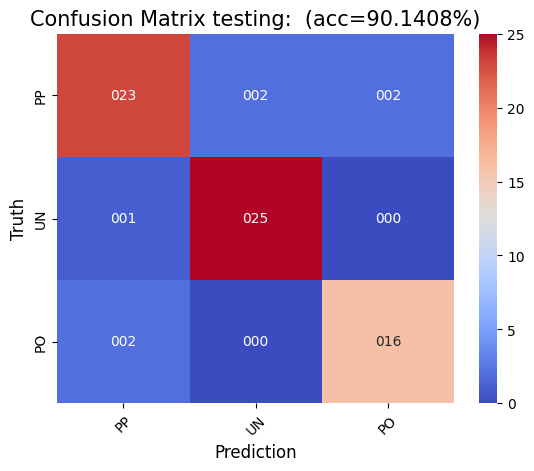

In [29]:
# bag of word
cnt_vectorizer = CountVectorizer(stop_words='english',min_df=0.01,max_df=0.9)
X_train_bow = cnt_vectorizer.fit_transform(X_train_tweet)
X_test_bow = cnt_vectorizer.transform(X_test_tweet)

print("Using Bag of Words")
print("bow shape: ", X_train_bow.shape)
X_train_full = np.concatenate((X_train,X_train_bow.toarray()),axis=1)
X_test_full = np.concatenate((X_test,X_test_bow.toarray()),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te = do_logistic_regression(X_train_full,X_test_full)
evaluate(y_pred_te)

Using Word2Vec
vec shape:  (282, 100)
full shape:  (282, 219)


Best parameters found by grid search: {'C': 0.1, 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

          PO       0.76      0.81      0.79        27
          PP       0.96      0.92      0.94        26
          UN       0.76      0.72      0.74        18

    accuracy                           0.83        71
   macro avg       0.83      0.82      0.82        71
weighted avg       0.83      0.83      0.83        71



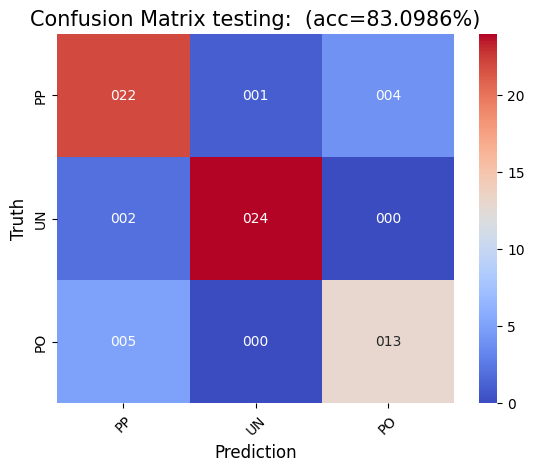

In [23]:
# word2vec
print("Using Word2Vec")
print("vec shape: ", X_train_vec.shape)
X_train_full = np.concatenate((X_train,X_train_vec),axis=1)
X_test_full = np.concatenate((X_test,X_test_vec),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te = do_logistic_regression(X_train_full,X_test_full)
evaluate(y_pred_te)

In [24]:
def do_logistic_regression(X_tr,X_te):
    # Setting up the logistic regression model
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')

    # Defining the parameter grid for grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Performing grid search with 5-fold cross-validation
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_tr, y_train)

    # Best parameters found by grid search
    best_params = grid_search.best_params_
    print('Best parameters found by grid search:', best_params)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predicting on both training and testing sets
    y_pred_train = best_model.predict(X_tr)
    y_pred_test = best_model.predict(X_te)

    return y_pred_train,y_pred_test
        

In [25]:
# Function to perform grid search and model fitting using Random Forest
def do_randomforest(X_tr, X_te):
    # Setting up the Random Forest model
    rf = RandomForestClassifier()

    # Defining the parameter grid for grid search
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Performing grid search with 5-fold cross-validation
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_tr, y_train)

    # Best parameters found by grid search
    best_params = grid_search.best_params_
    print('Best parameters found by grid search:', best_params)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predicting on both training and testing sets
    y_pred_train = best_model.predict(X_tr)
    y_pred_test = best_model.predict(X_te)

    return y_pred_train, y_pred_test

Using TF-IDF
tf-idf shape:  (282, 394)
full shape:  (282, 513)
Best parameters found by grid search: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

          PO       0.80      0.89      0.84        27
          PP       0.95      0.81      0.88        26
          UN       0.89      0.94      0.92        18

    accuracy                           0.87        71
   macro avg       0.88      0.88      0.88        71
weighted avg       0.88      0.87      0.87        71



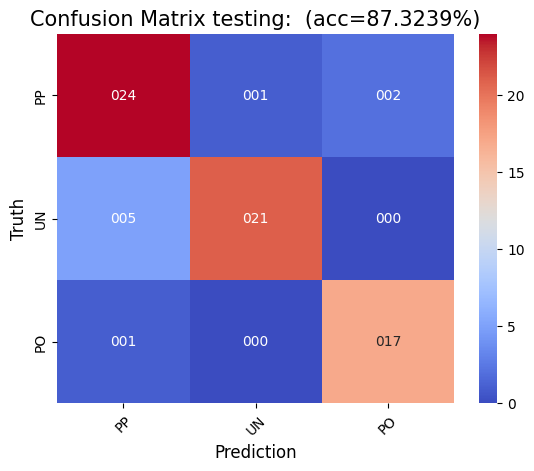

In [26]:
print("Using TF-IDF")
print("tf-idf shape: ", X_train_tweet_tfid.shape)
X_train_full = np.concatenate((X_train,X_train_tweet_tfid.toarray()),axis=1)
X_test_full = np.concatenate((X_test,X_test_tweet_tfid.toarray()),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te = do_randomforest(X_train_full, X_test_full)
evaluate(y_pred_te)

Using Bag of Words
bow shape:  (282, 2550)
full shape:  (282, 2669)
Best parameters found by grid search: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

          PO       0.86      0.93      0.89        27
          PP       0.96      0.88      0.92        26
          UN       0.94      0.94      0.94        18

    accuracy                           0.92        71
   macro avg       0.92      0.92      0.92        71
weighted avg       0.92      0.92      0.92        71



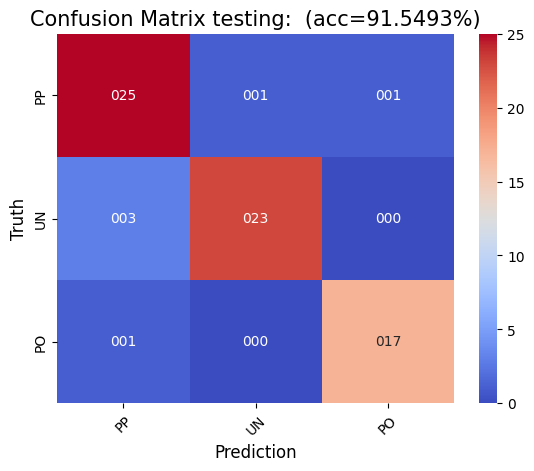

In [27]:
# bag of word
print("Using Bag of Words")
print("bow shape: ", X_train_bow.shape)
X_train_full = np.concatenate((X_train,X_train_bow.toarray()),axis=1)
X_test_full = np.concatenate((X_test,X_test_bow.toarray()),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te =do_randomforest(X_train_full, X_test_full)
evaluate(y_pred_te)

Using Word2Vec
vec shape:  (282, 100)
full shape:  (282, 219)
Best parameters found by grid search: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

          PO       0.69      0.93      0.79        27
          PP       0.96      0.85      0.90        26
          UN       0.92      0.61      0.73        18

    accuracy                           0.82        71
   macro avg       0.86      0.79      0.81        71
weighted avg       0.85      0.82      0.82        71



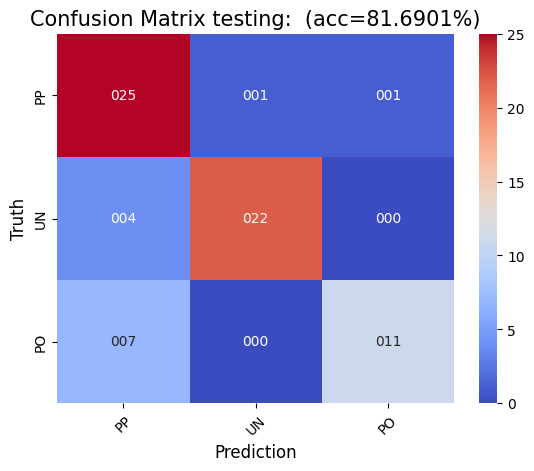

In [28]:
# word2vec
print("Using Word2Vec")
print("vec shape: ", X_train_vec.shape)
X_train_full = np.concatenate((X_train,X_train_vec),axis=1)
X_test_full = np.concatenate((X_test,X_test_vec),axis=1)
print("full shape: ",X_train_full.shape)

y_pred_tr, y_pred_te =do_randomforest(X_train_full, X_test_full)
evaluate(y_pred_te)